In [1]:
# Importing libraries for data manipulation
import pandas as pd

import numpy as np

# Importing libraries for data visualization
import matplotlib.pylab as plt

# Importing an advanced library for data visualization
import seaborn as sns

# Importing library for date manipulation
from datetime import datetime

# Import library for preparing data
from sklearn.model_selection import train_test_split

# To calculate the MSE or RMSE
from sklearn.metrics import mean_squared_error

# Importing acf and pacf functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Importing models from statsmodels library
from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.arima.model import ARIMA

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [2]:
# Loading the dataset
df = pd.read_csv('C:/Users/14342/Desktop/Time Series/NQ_1440.csv')

# Looking at first five records of t he data
df.head()

Date   Time    Open    High     Low   Close      Up    Down
0  09/02/2003  17:00  2174.0  2190.0  2158.0  2189.5  155382  144365
1  09/03/2003  17:00  2188.0  2201.5  2179.0  2186.5  157250  155277
2  09/04/2003  17:00  2187.0  2206.0  2181.0  2203.0  136800  142912
3  09/05/2003  17:00  2204.5  2206.5  2179.0  2191.5  162496  172109
4  09/08/2003  17:00  2189.5  2214.0  2188.0  2213.5  156314  139613

## **Checking the info** 

In [3]:
# Method to check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5168 non-null   object 
 1   Time    5168 non-null   object 
 2   Open    5168 non-null   float64
 3   High    5168 non-null   float64
 4   Low     5168 non-null   float64
 5   Close   5168 non-null   float64
 6   Up      5168 non-null   int64  
 7   Down    5168 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 323.1+ KB


In [4]:
df = df.rename(columns={'Date': 'Timestamp'})



In [5]:
# Converting Timestamp to datetime data type
df.Timestamp = pd.to_datetime(df.Timestamp, infer_datetime_format = True)

Here, **we don't need datetime as a column** because we only need values to build the model. So, we can keep the dates as an index instead of a column in the data.

In [6]:
# Setting date as the index
df = df.set_index(['Timestamp'])

df.head()

Time    Open    High     Low   Close      Up    Down
Timestamp                                                        
2003-09-02  17:00  2174.0  2190.0  2158.0  2189.5  155382  144365
2003-09-03  17:00  2188.0  2201.5  2179.0  2186.5  157250  155277
2003-09-04  17:00  2187.0  2206.0  2181.0  2203.0  136800  142912
2003-09-05  17:00  2204.5  2206.5  2179.0  2191.5  162496  172109
2003-09-08  17:00  2189.5  2214.0  2188.0  2213.5  156314  139613

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5168 entries, 2003-09-02 to 2023-09-01
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5168 non-null   object 
 1   Open    5168 non-null   float64
 2   High    5168 non-null   float64
 3   Low     5168 non-null   float64
 4   Close   5168 non-null   float64
 5   Up      5168 non-null   int64  
 6   Down    5168 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 323.0+ KB


In [8]:
import pandas as pd

# Remove the 'Time' column
df = df.drop(columns=['Time'])
df = df.drop(columns=['Open'])
df = df.drop(columns=['High'])
df = df.drop(columns=['Low'])
df = df.drop(columns=['Up'])
df = df.drop(columns=['Down'])

print("\nAfter removing 'Time' column:")
print(df)



After removing 'Time' column:
               Close
Timestamp           
2003-09-02   2189.50
2003-09-03   2186.50
2003-09-04   2203.00
2003-09-05   2191.50
2003-09-08   2213.50
...              ...
2023-08-28  15098.00
2023-08-29  15426.25
2023-08-30  15513.00
2023-08-31  15536.50
2023-09-01  15511.25

[5168 rows x 1 columns]


In [9]:
df.head()

Close
Timestamp         
2003-09-02  2189.5
2003-09-03  2186.5
2003-09-04  2203.0
2003-09-05  2191.5
2003-09-08  2213.5

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5168 entries, 2003-09-02 to 2023-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5168 non-null   float64
dtypes: float64(1)
memory usage: 80.8 KB


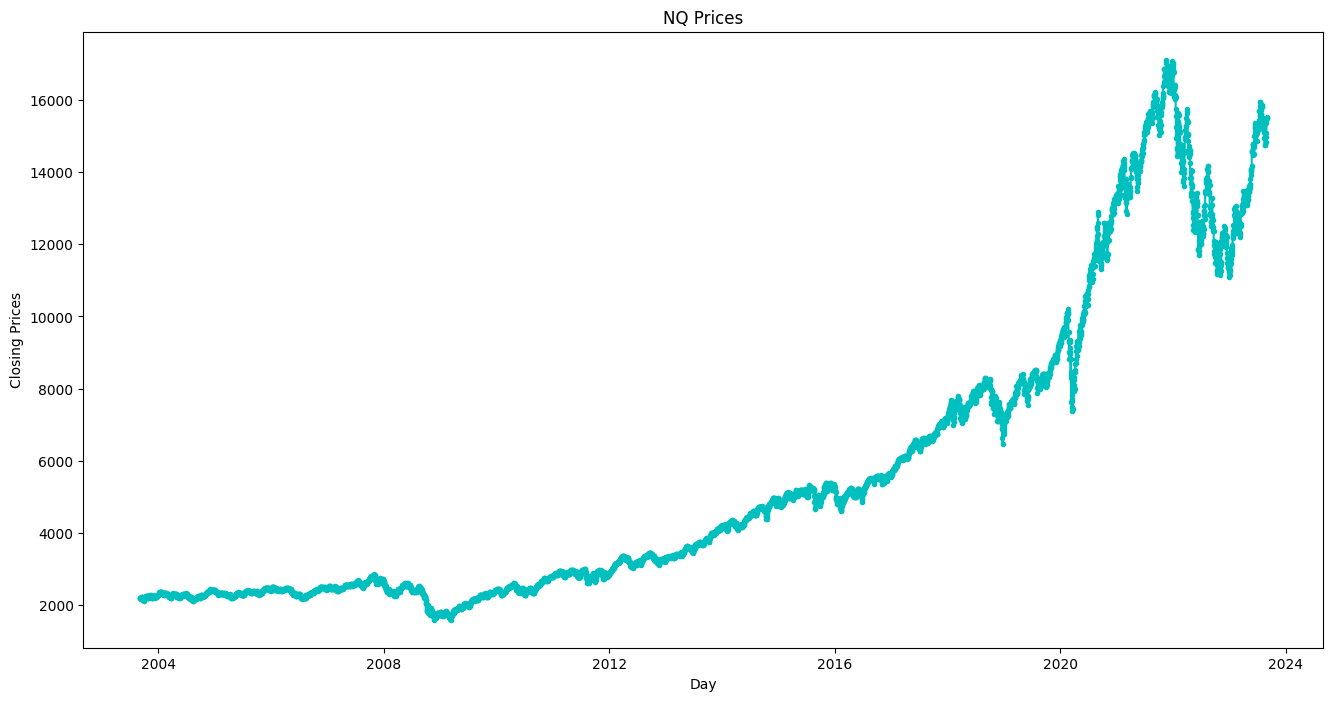

In [11]:
# Visualizing the time series
plt.figure(figsize=(16, 8))

plt.xlabel("Day")

plt.ylabel("Closing Prices")

plt.title('NQ Prices')

plt.plot(df.index, df.Close, color = 'c', marker = '.')

In [12]:
# Splitting the data into train and test sets
df_train, df_test = df.iloc[:-252], df.iloc[-252:]

print(df_train)

print(df_test)

               Close
Timestamp           
2003-09-02   2189.50
2003-09-03   2186.50
2003-09-04   2203.00
2003-09-05   2191.50
2003-09-08   2213.50
...              ...
2022-09-06  12516.75
2022-09-07  12760.00
2022-09-08  12842.75
2022-09-09  13090.50
2022-09-12  13275.75

[4916 rows x 1 columns]
               Close
Timestamp           
2022-09-13  12548.25
2022-09-14  12671.25
2022-09-15  12394.25
2022-09-16  12382.00
2022-09-19  12466.75
...              ...
2023-08-28  15098.00
2023-08-29  15426.25
2023-08-30  15513.00
2023-08-31  15536.50
2023-09-01  15511.25

[252 rows x 1 columns]


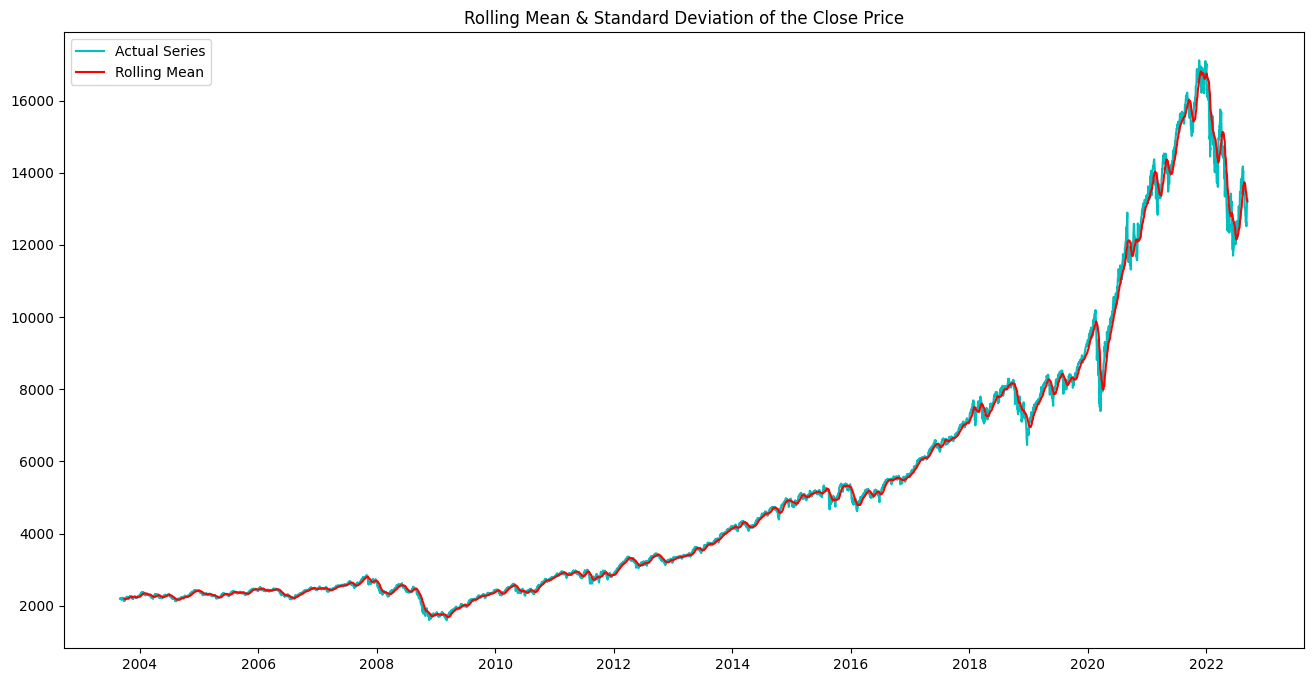

In [13]:
# Calculating the rolling mean and standard deviation for a window of 20 observations
rolmean = df_train['Close'].rolling(window = 20).mean()

rolstd = df_train['Close'].rolling(window = 20).std()

# Visualizing the rolling mean and standard deviation
plt.figure(figsize = (16, 8))

actual = plt.plot(df_train['Close'], color = 'c', label = 'Actual Series')

rollingmean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean') 

plt.title('Rolling Mean & Standard Deviation of the Close Price')

plt.legend()

plt.show()


In [14]:
def adfuller(data):
    # Importing adfuller using statsmodels
    from statsmodels.tsa.stattools import adfuller
    import pandas as pd
    
    print('Dickey-Fuller Test: ')
    
    adftest = adfuller(data['Close'])
    
    adfoutput = pd.Series(adftest[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'No. of Observations'])
    
    for key, value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    
    print(adfoutput)
    return adfoutput
result = adfuller(df)


Dickey-Fuller Test: 
Test Statistic             1.291898
p-value                    0.996563
Lags Used                 26.000000
No. of Observations     5141.000000
Critical Value (1%)       -3.431623
Critical Value (5%)       -2.862102
Critical Value (10%)      -2.567069
dtype: float64


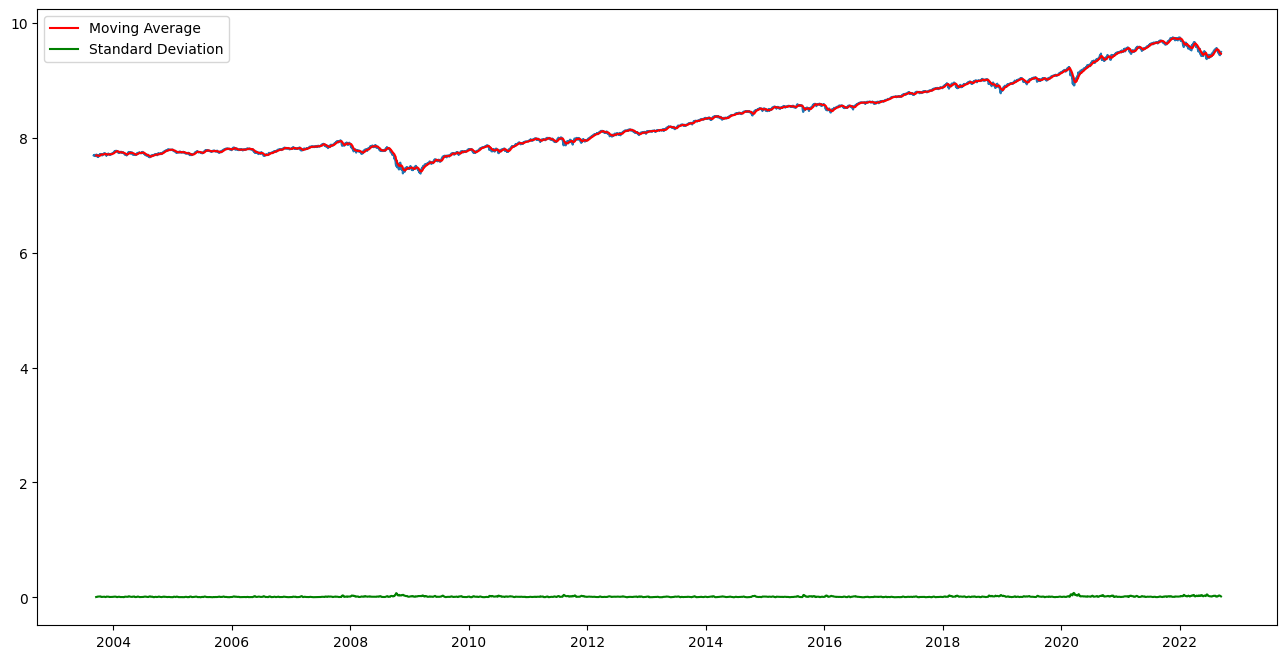

In [15]:
# Visualize the rolling mean and standard deviation after using log transformation
plt.figure(figsize = (16, 8))

df_log = np.log(df_train)

MAvg = df_log.rolling(window = 12).mean()

MStd = df_log.rolling(window = 12).std()

plt.plot(df_log)

plt.plot(MAvg, color='r', label = 'Moving Average')

plt.plot(MStd, color='g', label = 'Standard Deviation')

plt.legend()

plt.show()

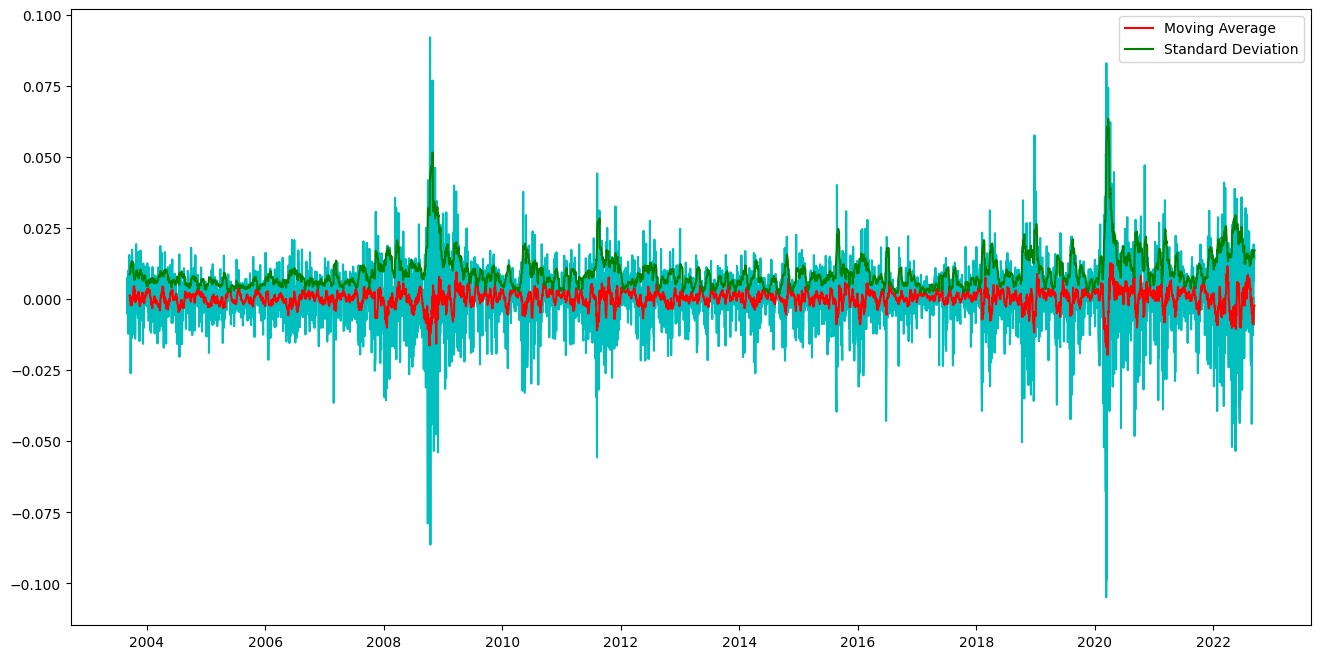

In [16]:
# Fixing the figure size
plt.figure(figsize = (16, 8))

df_shift = df_log - df_log.shift(periods = 1)

MAvg_shift = df_shift.rolling(window = 12).mean()

MStd_shift = df_shift.rolling(window = 12).std()

plt.plot(df_shift, color = 'c')

plt.plot(MAvg_shift, color = 'red', label = 'Moving Average')

plt.plot(MStd_shift, color = 'green', label = 'Standard Deviation')

plt.legend()

plt.show()

# Dropping the null values that we get after applying differencing method
df_shift = df_shift.dropna()

In [17]:
adfuller(df_shift)

Dickey-Fuller Test: 
Test Statistic         -1.457954e+01
p-value                 4.491714e-27
Lags Used               2.500000e+01
No. of Observations     4.889000e+03
Critical Value (1%)    -3.431688e+00
Critical Value (5%)    -2.862131e+00
Critical Value (10%)   -2.567085e+00
dtype: float64


Test Statistic         -1.457954e+01
p-value                 4.491714e-27
Lags Used               2.500000e+01
No. of Observations     4.889000e+03
Critical Value (1%)    -3.431688e+00
Critical Value (5%)    -2.862131e+00
Critical Value (10%)   -2.567085e+00
dtype: float64

In [18]:
df = df.asfreq('d')


In [19]:
df.index

DatetimeIndex(['2003-09-02', '2003-09-03', '2003-09-04', '2003-09-05',
               '2003-09-06', '2003-09-07', '2003-09-08', '2003-09-09',
               '2003-09-10', '2003-09-11',
               ...
               '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-26',
               '2023-08-27', '2023-08-28', '2023-08-29', '2023-08-30',
               '2023-08-31', '2023-09-01'],
              dtype='datetime64[ns]', name='Timestamp', length=7305, freq='D')

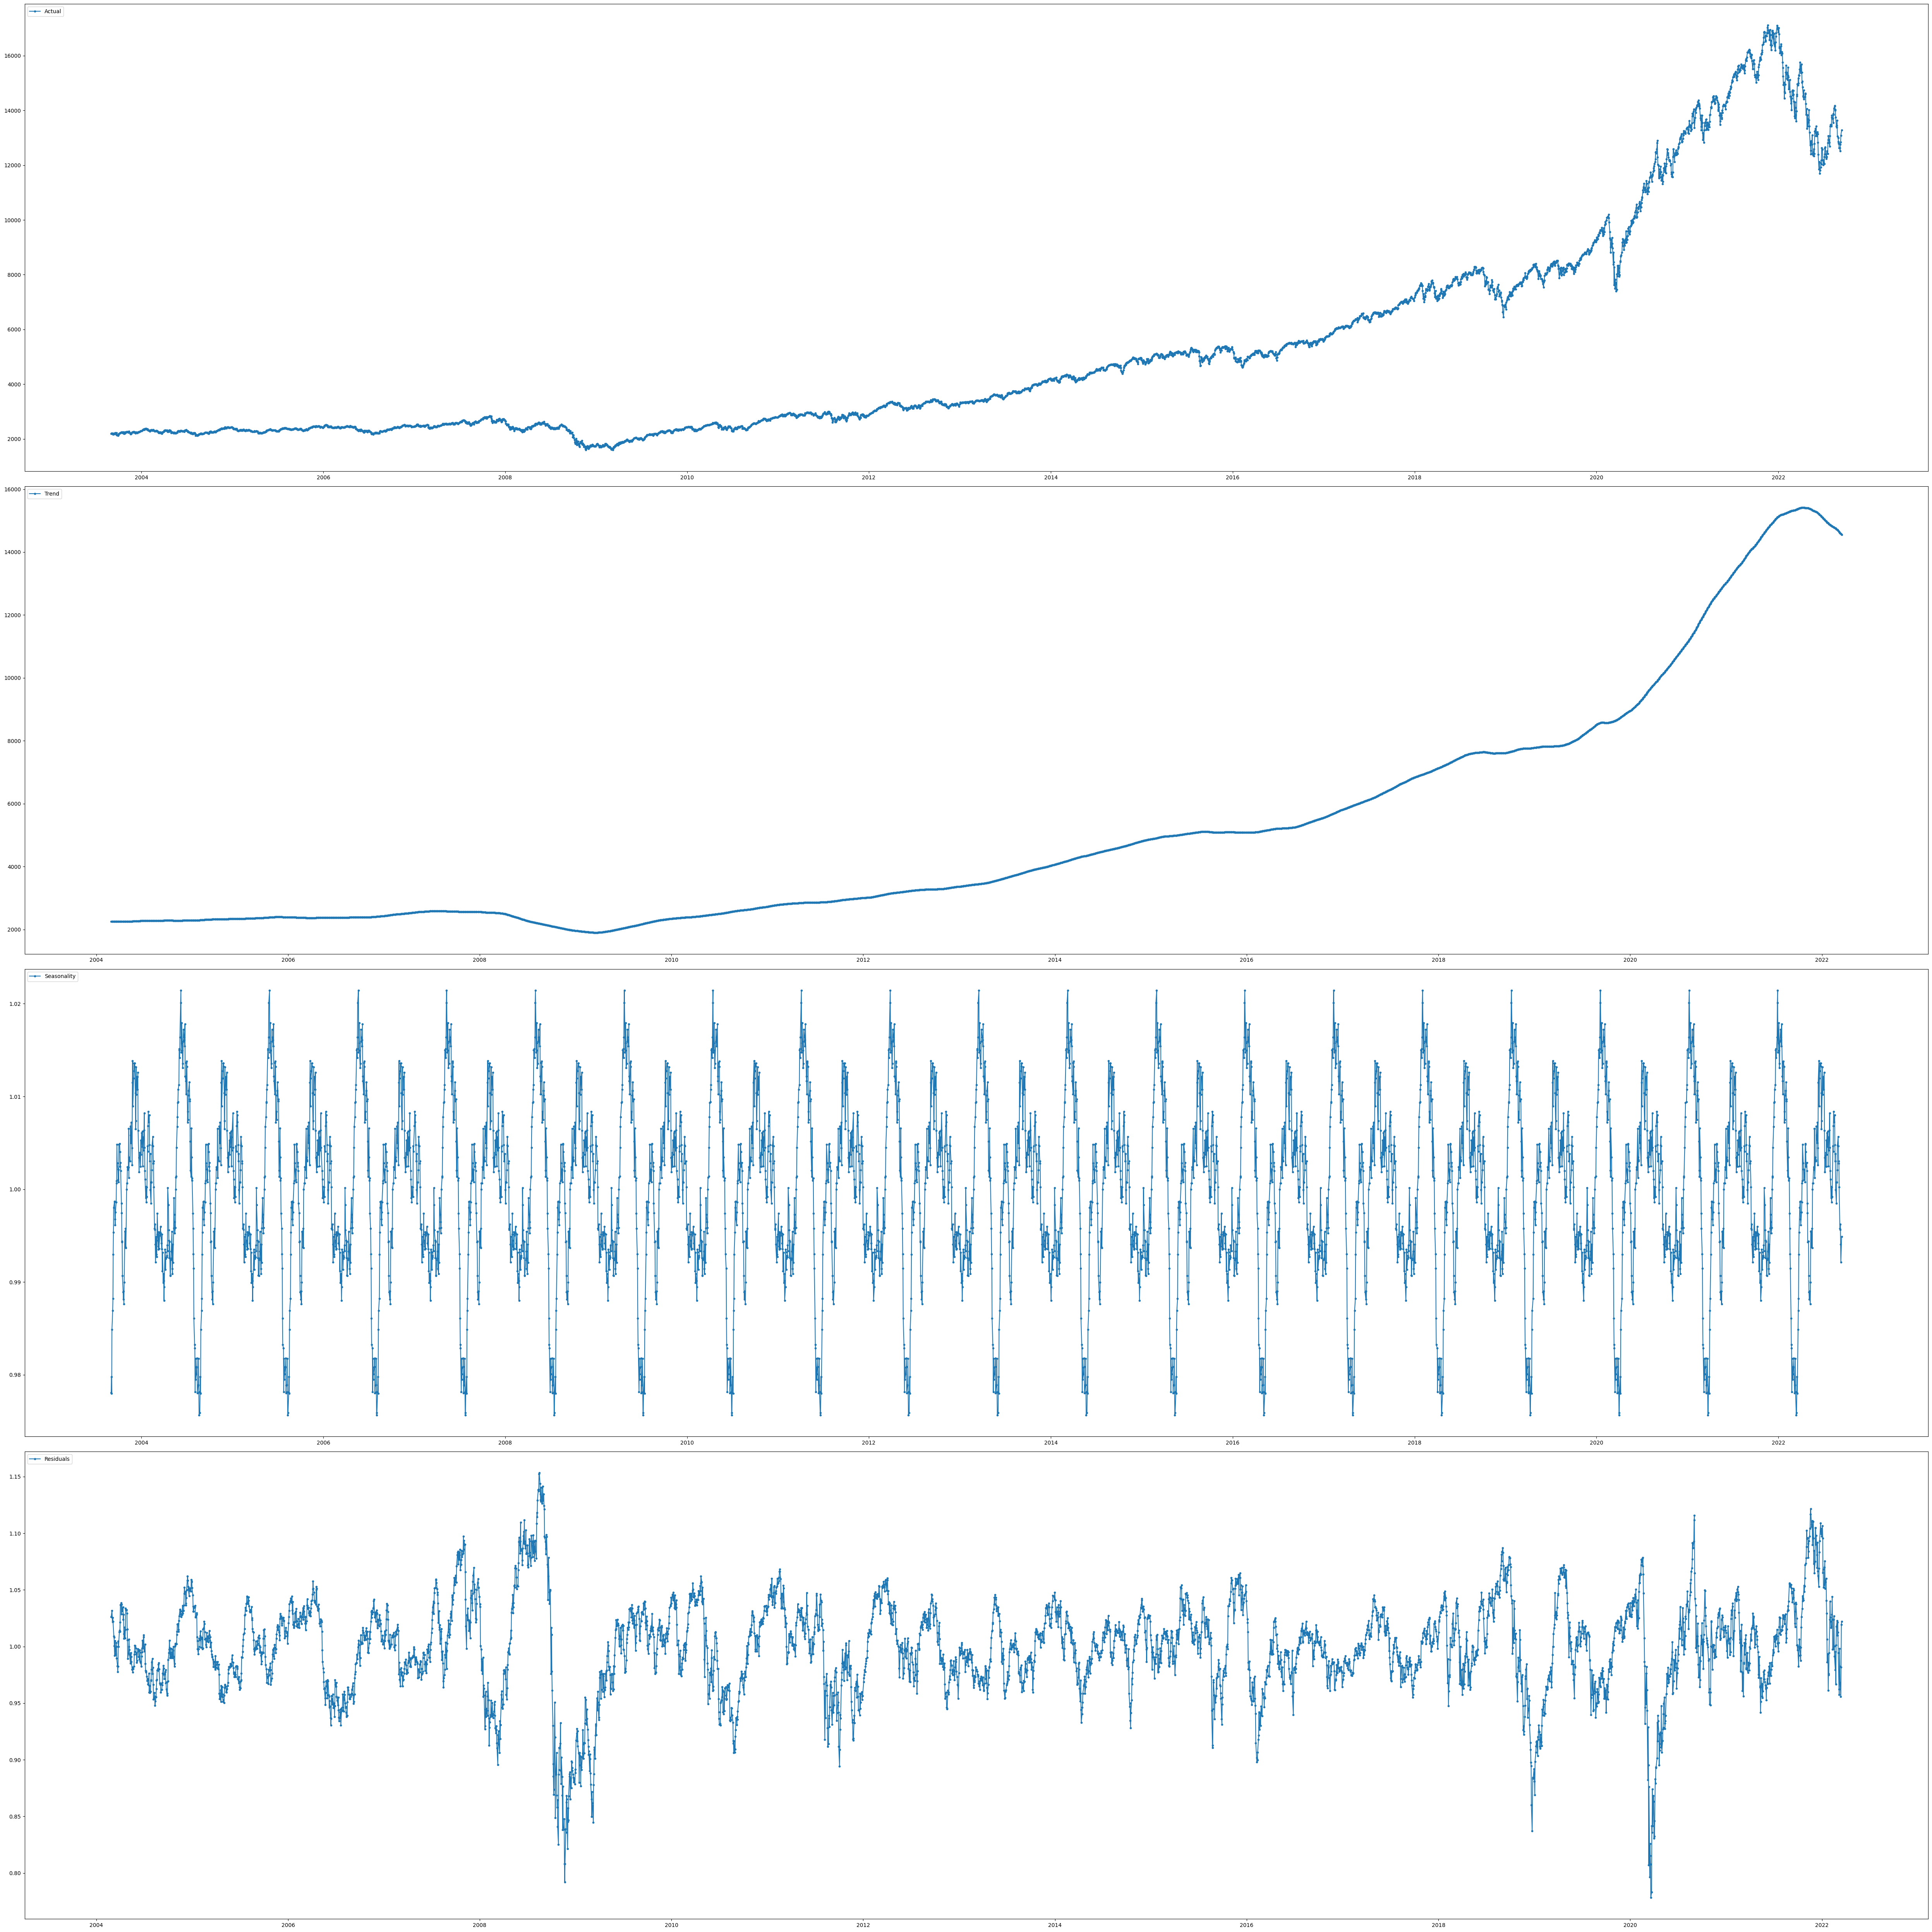

In [20]:
# Importing the seasonal_decompose to decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_train,model = 'multiplicative', period = 252)

trend = decomp.trend

seasonal = decomp.seasonal

residual = decomp.resid

plt.figure(figsize = (50, 50))

plt.subplot(411)

plt.plot(df_train, label = 'Actual', marker = '.')

plt.legend(loc = 'upper left')

plt.subplot(412)

plt.plot(trend, label = 'Trend', marker = '.')

plt.legend(loc = 'upper left')

plt.subplot(413)

plt.plot(seasonal, label = 'Seasonality', marker = '.')

plt.legend(loc = 'upper left')

plt.subplot(414)

plt.plot(residual, label = 'Residuals', marker = '.')

plt.legend(loc = 'upper left')

plt.tight_layout()

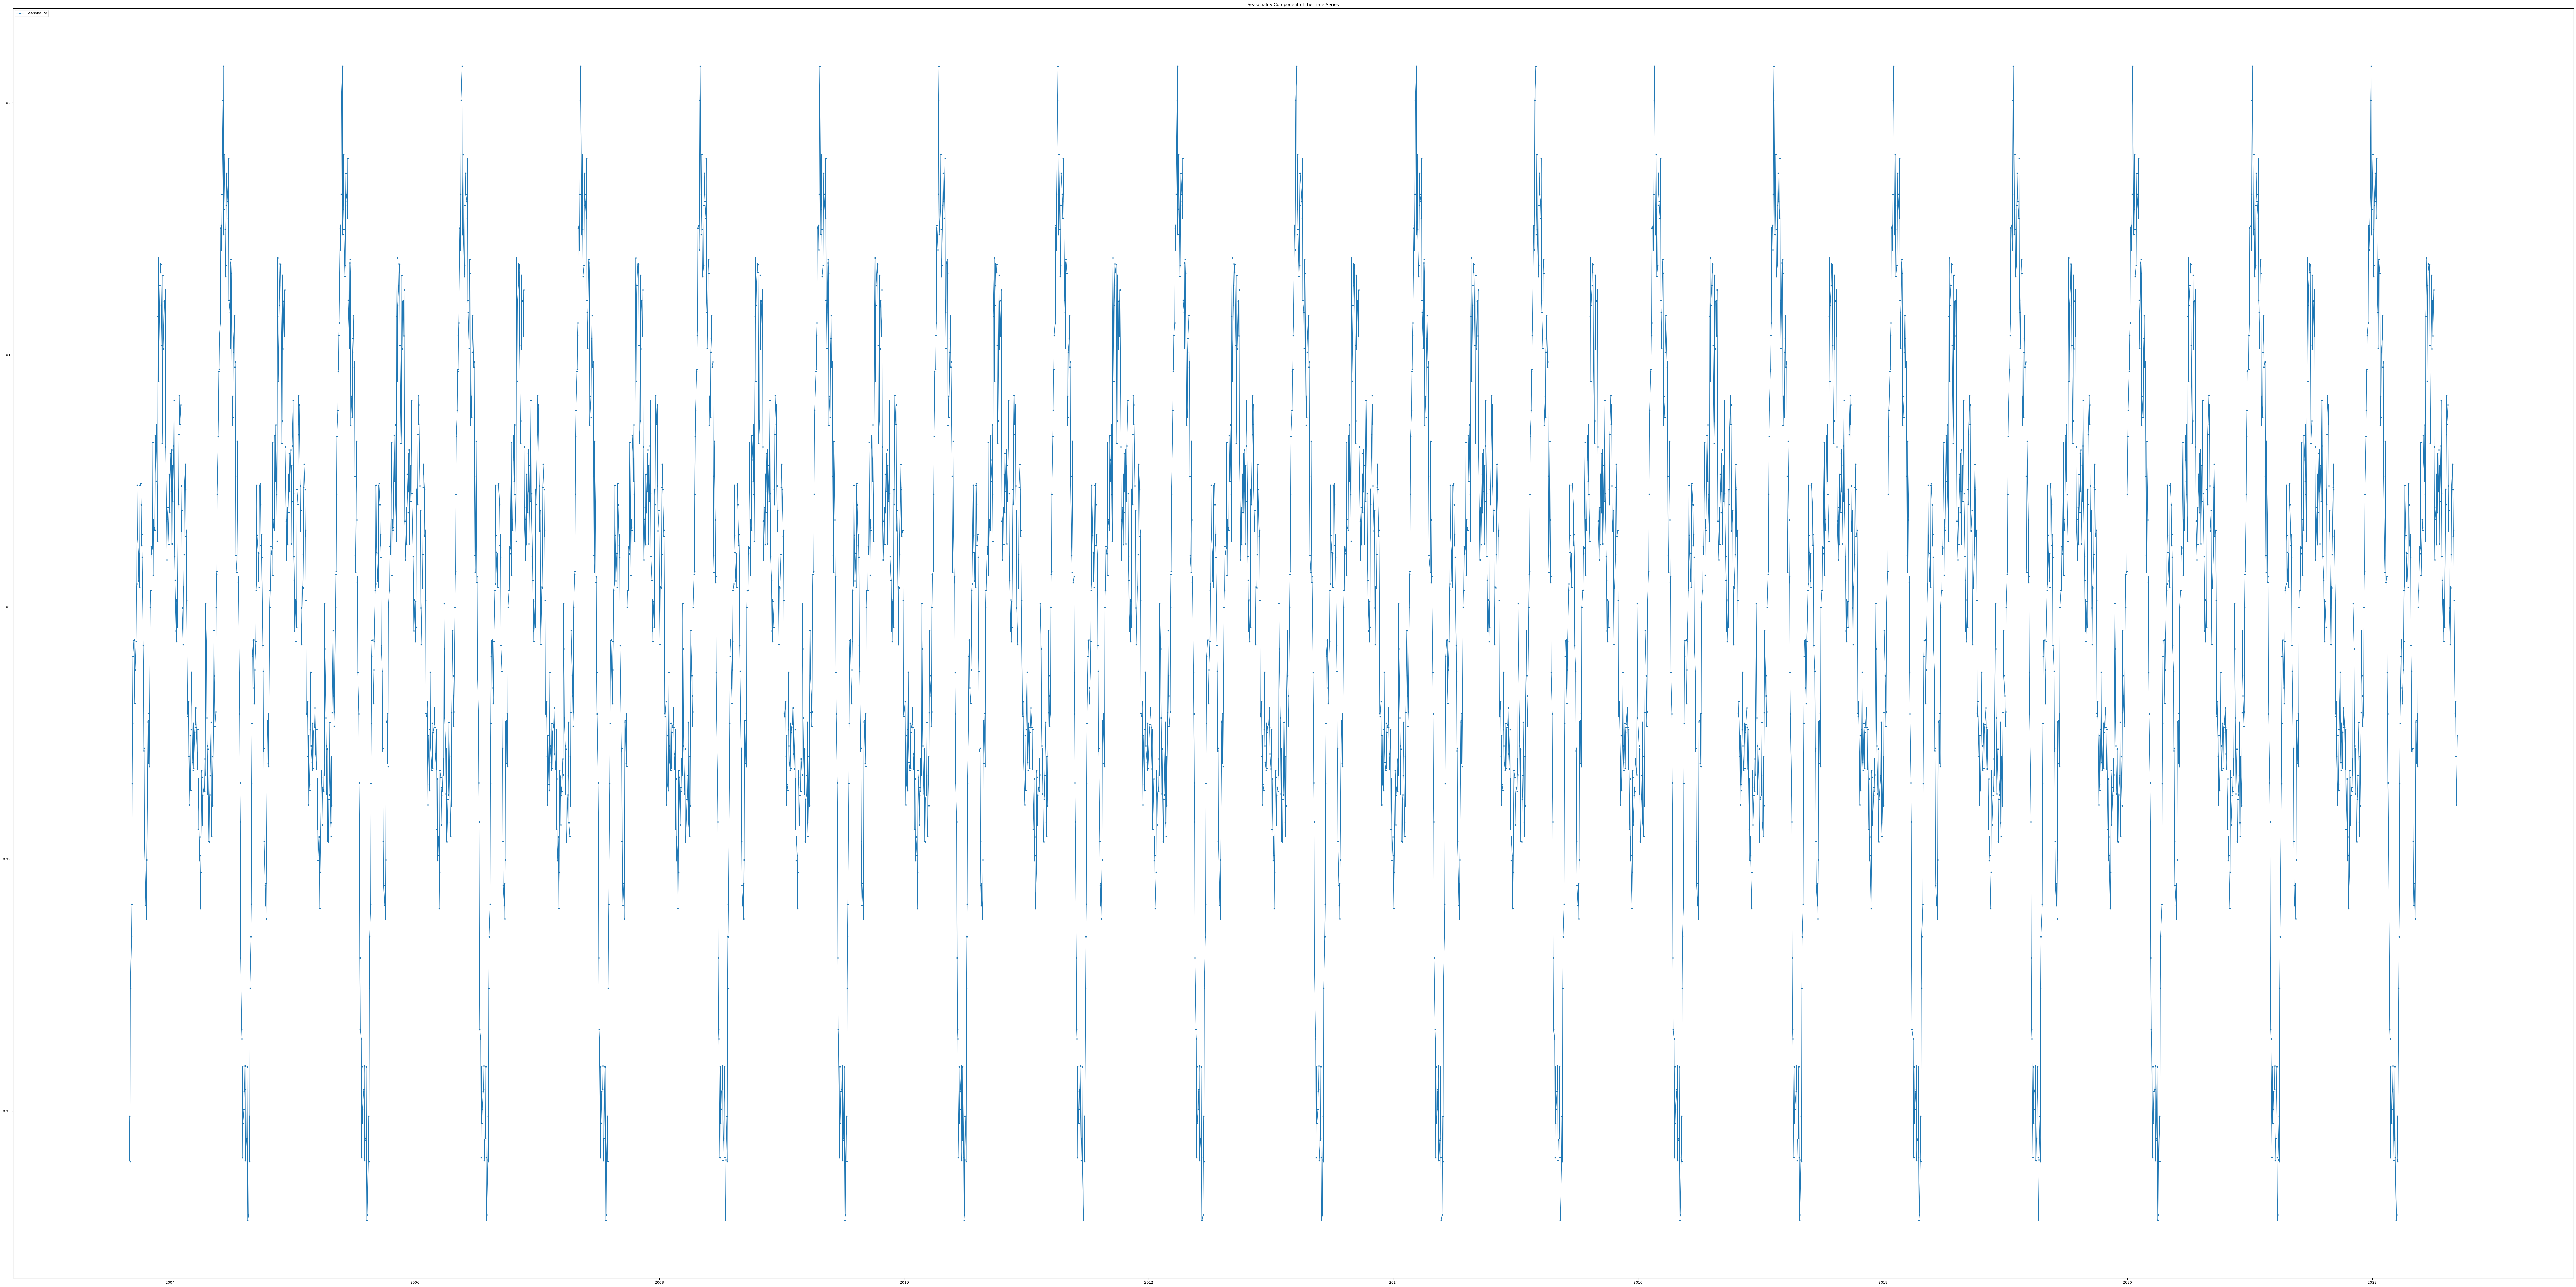

In [21]:
# Importing necessary libraries
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decomposing the time series
decomp = seasonal_decompose(df_train, model='multiplicative', period=252)
seasonal = decomp.seasonal

# Plotting the seasonality component
plt.figure(figsize=(100, 50))
plt.plot(seasonal, label='Seasonality', marker='.')
plt.title('Seasonality Component of the Time Series')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1600x800 with 0 Axes>

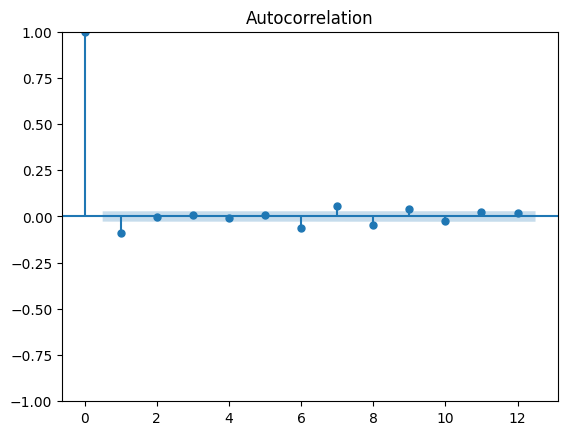

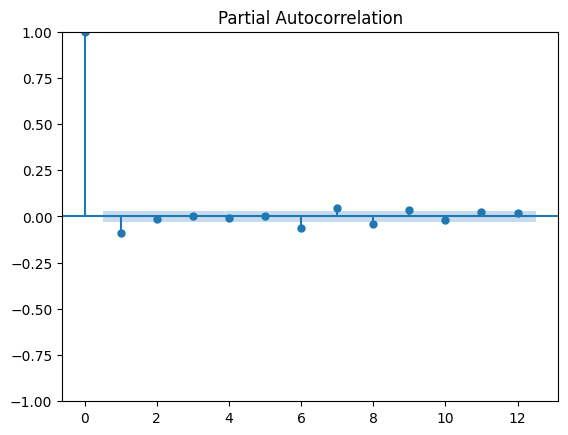

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize = (16, 8))

plot_acf(df_shift, lags = 12) 

plt.show()

plot_pacf(df_shift, lags = 12) 

plt.show()

## **AR Model**

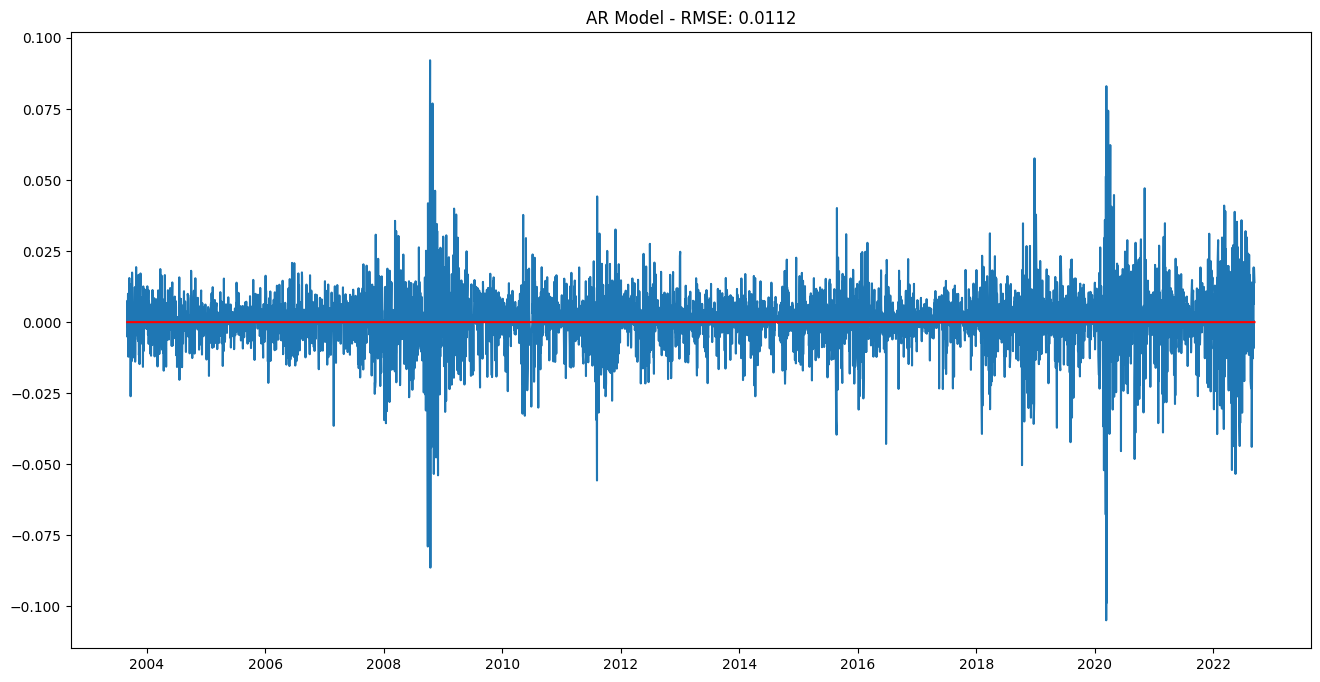

In [23]:
# Importing AutoReg function to apply AR model
from statsmodels.tsa.ar_model import AutoReg

plt.figure(figsize = (16, 8))

# Using number of lags as 1
model_AR = AutoReg(df_shift, lags = 1)

results_AR = model_AR.fit()

plt.plot(df_shift)

predict = results_AR.predict(start = 0, end = len(df_shift) - 1)

# Converting NaN values to 0
predict = predict.fillna(0)

plt.plot(predict, color = 'red')

# Calculating rmse
plt.title('AR Model - RMSE: %.4f'% mean_squared_error(predict, df_shift['Close'], squared = False))

plt.show()

In [24]:
# Checking the AIC value
results_AR.aic

-30238.096697230707

## **MA Model**

**We will be using an ARIMA model with p = 0 and d = 0 so that it works as an MA model.**

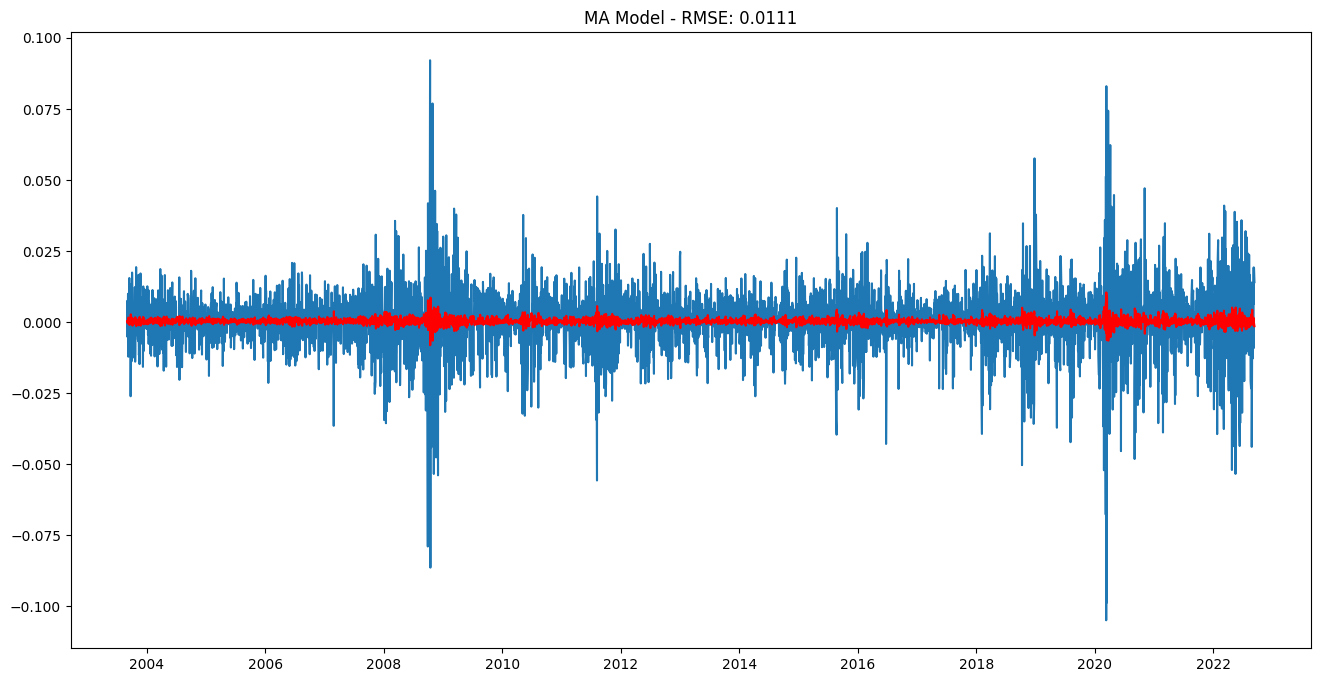

In [25]:
plt.figure(figsize = (16, 8))

# Using p=0, d = 0, q = 1
model_MA = ARIMA(df_shift, order = (0, 0, 1))

results_MA = model_MA.fit()

plt.plot(df_shift)

plt.plot(results_MA.fittedvalues, color = 'red')

plt.title('MA Model - RMSE: %.4f'% mean_squared_error(results_MA.fittedvalues, df_shift['Close'], squared = False))

plt.show()

- **The MA model is giving a slightly higher RMSE** when compared to the AR model.

Let's check the AIC value of the model.

In [26]:
# Calculating the AIC value
results_MA.aic

-30245.802813252678

## **ARMA Model**

We will be using an **ARIMA model with p = 1 and q = 1** (as observed from the ACF and PACF plots) **and d = 0 so that it works as an ARMA model.**

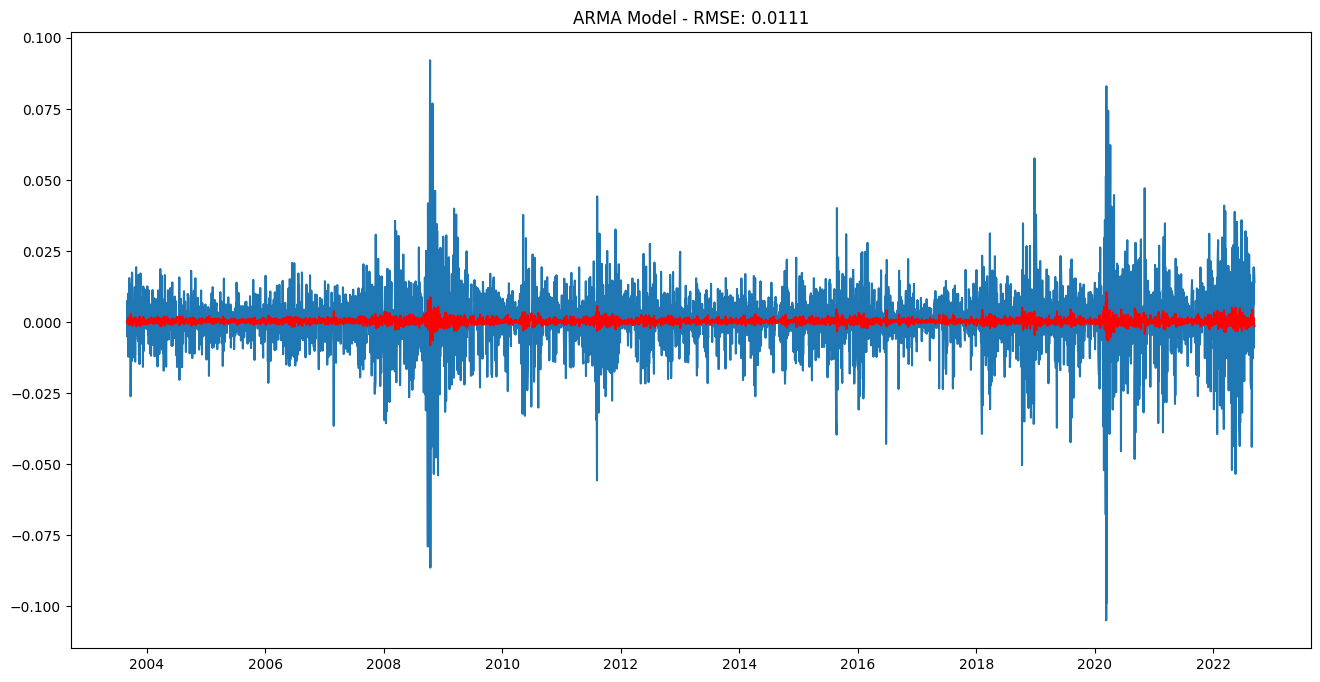

In [27]:
plt.figure(figsize = (16, 8))

# Using p = 1, d = 0, q = 1
model_ARMA = ARIMA(df_shift, order = (1, 0, 1))

results_ARMA = model_ARMA.fit()

plt.plot(df_shift)

plt.plot(results_ARMA.fittedvalues, color = 'red')

plt.title('ARMA Model - RMSE: %.4f'% mean_squared_error(results_ARMA.fittedvalues, df_shift['Close'], squared = False))

plt.show()

In [28]:
# Calculating the AIC value
results_ARMA.aic

-30243.82702257925

## **ARIMA Model**

We will be using an **ARIMA model with p = 1, d = 1, & q = 1**.

Since we are using d = 1 in the ARIMA model, it will result in double differencing of the df_log series. So, we need double shifted series in order to calculate the RMSE of the model.

In [38]:
# Getting double differenced series
df_shift2 = df_log - df_log.shift(periods = 2)

df_shift2.dropna(inplace = True)

In [55]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model to the df_shift series
model_ARIMA = ARIMA(df_shift, order = (1, 1, 1))

results_ARIMA = model_ARIMA.fit()


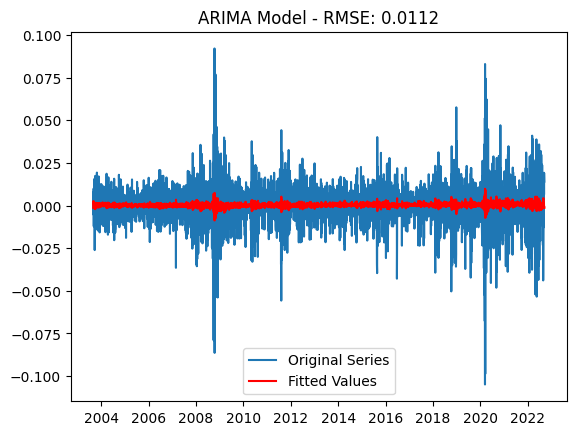

In [56]:
fitted_values_without_first_row = results_ARIMA.fittedvalues[1:]

# Plot the original df_shift series (excluding the first data point)
plt.plot(df_shift[1:], label='Original Series')

# Plot the fitted values from the ARIMA model
plt.plot(fitted_values_without_first_row, color='red', label='Fitted Values')

# Calculate and display the RMSE in the plot title
plt.title('ARIMA Model - RMSE: %.4f' % mean_squared_error(df_shift[1:].dropna(), fitted_values_without_first_row, squared=False))

# Show the legend and the plot
plt.legend()
plt.show()


In [57]:
# Calculating the AIC value
results_ARIMA.aic

-30227.742597715755

In [58]:
# Printing the fitted values
predictions = pd.Series(results_ARMA.fittedvalues)

predictions

Timestamp
2003-09-03    0.000365
2003-09-04    0.000524
2003-09-05   -0.000279
2003-09-08    0.000808
2003-09-09   -0.000475
                ...   
2022-09-06    0.000504
2022-09-07    0.001269
2022-09-08   -0.001278
2022-09-09   -0.000395
2022-09-12   -0.001463
Length: 4915, dtype: float64

In [59]:
# First step - doing cumulative sum
predictions_cumsum = predictions.cumsum()

predictions_cumsum

Timestamp
2003-09-03    0.000365
2003-09-04    0.000890
2003-09-05    0.000611
2003-09-08    0.001418
2003-09-09    0.000944
                ...   
2022-09-06    1.797467
2022-09-07    1.798736
2022-09-08    1.797457
2022-09-09    1.797062
2022-09-12    1.795599
Length: 4915, dtype: float64

In [60]:
# Second step - adding the first value of the log series to the cumulative sum values
predictions_log = pd.Series(df_log['Close'].iloc[0], index = df_log.index)

predictions_log = predictions_log.add(predictions_cumsum, fill_value = 0)

predictions_log

Timestamp
2003-09-02    7.691428
2003-09-03    7.691794
2003-09-04    7.692318
2003-09-05    7.692039
2003-09-08    7.692847
                ...   
2022-09-06    9.488895
2022-09-07    9.490164
2022-09-08    9.488886
2022-09-09    9.488491
2022-09-12    9.487028
Length: 4916, dtype: float64

In [61]:
# Third step - applying exponential transformation
predictions_ARMA = np.exp(predictions_log)

predictions_ARMA

Timestamp
2003-09-02     2189.500000
2003-09-03     2190.299641
2003-09-04     2191.448450
2003-09-05     2190.837135
2003-09-08     2192.607580
                  ...     
2022-09-06    13212.190436
2022-09-07    13228.965578
2022-09-08    13212.067295
2022-09-09    13206.845512
2022-09-12    13187.542272
Length: 4916, dtype: float64

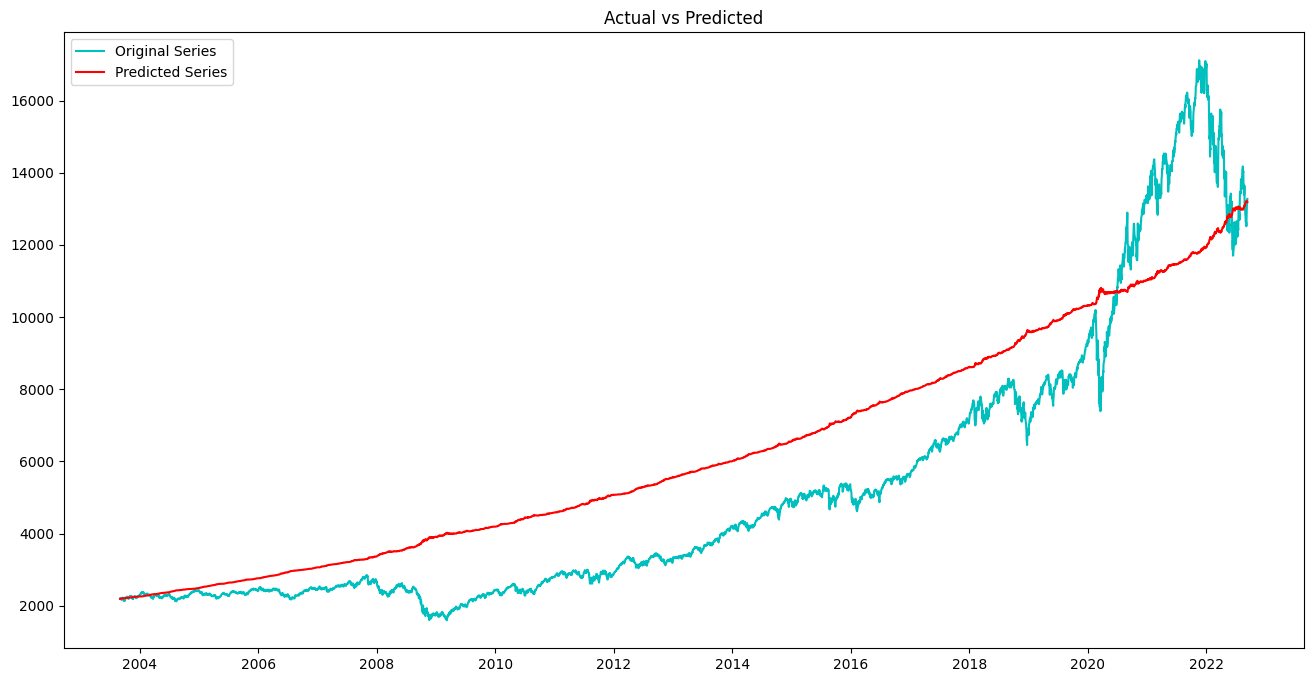

In [62]:
# Plotting the original vs predicted series
plt.figure(figsize = (16, 8))

plt.plot(df_train, color = 'c', label = 'Original Series')

plt.plot(predictions_ARMA, color = 'r', label = 'Predicted Series')

plt.title('Actual vs Predicted')

plt.legend()

plt.show()

In [63]:
# Forecasting the values for next 12 months where 'steps' represent the number of months
forecasted_ARMA = results_ARMA.forecast(steps = 365)

forecasted_ARMA

4915   -0.001121
4916    0.000327
4917    0.000364
4918    0.000365
4919    0.000365
          ...   
5275    0.000365
5276    0.000365
5277    0.000365
5278    0.000365
5279    0.000365
Name: predicted_mean, Length: 365, dtype: float64

In [64]:
# Creating a series of cumulative sum
forecasted_cumsum = forecasted_ARMA.cumsum()

forecasted_cumsum

4915   -0.001121
4916   -0.000794
4917   -0.000430
4918   -0.000065
4919    0.000300
          ...   
5275    0.130294
5276    0.130659
5277    0.131024
5278    0.131389
5279    0.131754
Name: predicted_mean, Length: 365, dtype: float64

In [65]:
# Creating a series of cumulative sum
forecasted_cumsum = forecasted_ARMA.cumsum()

forecasted_cumsum

4915   -0.001121
4916   -0.000794
4917   -0.000430
4918   -0.000065
4919    0.000300
          ...   
5275    0.130294
5276    0.130659
5277    0.131024
5278    0.131389
5279    0.131754
Name: predicted_mean, Length: 365, dtype: float64

In [66]:
# Making a new dataframe to get the the indices from 2020-2021
index = pd.date_range('2022-09-02', '2023-09-01', freq = '1D')

df1 = pd.DataFrame()

df1['cumsum'] = forecasted_cumsum

df1.index = index

df1

cumsum
2022-09-02 -0.001121
2022-09-03 -0.000794
2022-09-04 -0.000430
2022-09-05 -0.000065
2022-09-06  0.000300
...              ...
2023-08-28  0.130294
2023-08-29  0.130659
2023-08-30  0.131024
2023-08-31  0.131389
2023-09-01  0.131754

[365 rows x 1 columns]

In [67]:
# Adding the last value of the log of the training data
df1['Forecasted'] = df1['cumsum'] + float(df_log.loc['2003-09-02'])

df1

cumsum  Forecasted
2022-09-02 -0.001121    7.690308
2022-09-03 -0.000794    7.690634
2022-09-04 -0.000430    7.690999
2022-09-05 -0.000065    7.691364
2022-09-06  0.000300    7.691729
...              ...         ...
2023-08-28  0.130294    7.821722
2023-08-29  0.130659    7.822087
2023-08-30  0.131024    7.822452
2023-08-31  0.131389    7.822817
2023-09-01  0.131754    7.823183

[365 rows x 2 columns]

In [68]:
# Applying the exponential transformation to the forecasted log values
forecasted_ARMA = np.exp(df1['Forecasted'])

forecasted_ARMA

2022-09-02    2187.047618
2022-09-03    2187.761969
2022-09-04    2188.558783
2022-09-05    2189.358024
2022-09-06    2190.157611
                 ...     
2023-08-28    2494.196817
2023-08-29    2495.107738
2023-08-30    2496.018992
2023-08-31    2496.930578
2023-09-01    2497.842498
Freq: D, Name: Forecasted, Length: 365, dtype: float64

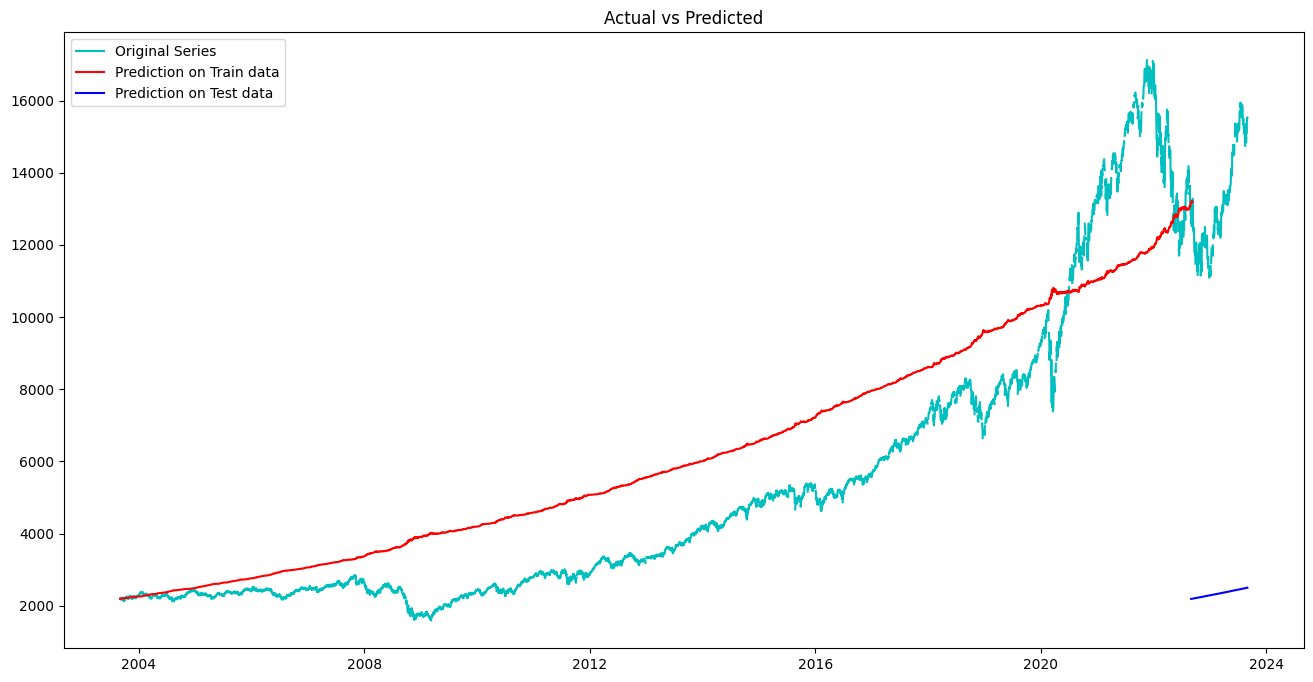

In [69]:
# Plotting the original vs predicted series
plt.figure(figsize=(16, 8))

# Plot the original series
plt.plot(df, color='c', label='Original Series')

# Plot the predictions on the training data
plt.plot(predictions_ARMA, color='r', label='Prediction on Train data')

# Plot the predictions on the test data
plt.plot(df1.index, forecasted_ARMA, label='Prediction on Test data', color='b')

plt.title('Actual vs Predicted')
plt.legend()
plt.show()
